In [20]:
import  tensorflow  as  tf
import  keras

import  matplotlib.pyplot  as  plt
import  numpy  as  np

from  keras  import  backend  as  k
from  keras.applications.inception_v3  import  InceptionV3, decode_predictions


tf.compat.v1.disable_eager_execution ()

In [23]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# iv3.summary()

In [46]:
from tensorflow.keras.preprocessing import image

beer = './beer.jpg'
hackImage = 'hackImage.png'


img = image.img_to_array(image.load_img(data_dir + beer, target_size=(299, 299)))
print(img.shape)

(299, 299, 3)




```
# Tiene formato de código
```

- Si se imprime img los resultados van a ser de 0 a 255 los colores pero incepcion funciona de -1 a 1 para lo cual se va a reescalar la imagen

In [47]:
# Conversión de 0-255 a -1-1
img /= 255
img -= 0.5
img *= 2


In [48]:
# El modelo pide que entre un tensor con una dimension mas esa dimension extra es el tamaño del batch (+1 imágen)
img = img.reshape([1, img.shape[0], img.shape[1], img.shape[2]])
print (img.shape)


(1, 299, 299, 3)


In [49]:
# Predicción
y=iv3.predict(img)
decode_predictions(y)

[[('n02823750', 'beer_glass', 0.9050045),
  ('n03950228', 'pitcher', 0.026866639),
  ('n02823428', 'beer_bottle', 0.007873057),
  ('n04560804', 'water_jug', 0.0046633333),
  ('n03983396', 'pop_bottle', 0.004225293)]]



```
# Tiene formato de código
```

## Ataque adversario

In [28]:
# Vamos a construir un nuevo grapho que permita clasificar las imágenes.
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951 # Limón


loss = out_layer[0, target_class]

grad = k.gradients(loss, inp_layer)[0]

# Que calcule el grafo de gradientes entre el tensor y la funcion de coste #tensor que dice como variar los pixeles
optimize_gradient = k.function([inp_layer, k.learning_phase()], [grad, loss])



In [35]:

pert=0.01

max_pert=img+pert
min_pert=img-pert

# adv = np.copy(img)


cost = 0.01
adv = np.copy(img)

while cost<0.95:
    gr, cost = optimize_gradient([adv, 0])
    adv += gr

    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    print('Coste de limón: ', cost)

Coste de limón:  0.00029641623
Coste de limón:  0.00030065913
Coste de limón:  0.00030578772
Coste de limón:  0.00031252214
Coste de limón:  0.00031979865
Coste de limón:  0.00032722784
Coste de limón:  0.00033505025
Coste de limón:  0.0003431609
Coste de limón:  0.00035168743
Coste de limón:  0.00036043854
Coste de limón:  0.00036945933
Coste de limón:  0.00037868865
Coste de limón:  0.00038806882
Coste de limón:  0.0003974719
Coste de limón:  0.00040720467
Coste de limón:  0.00041747303
Coste de limón:  0.0004282114
Coste de limón:  0.0004395214
Coste de limón:  0.00045187428
Coste de limón:  0.00046490188
Coste de limón:  0.00047843787
Coste de limón:  0.0004924354
Coste de limón:  0.0005075063
Coste de limón:  0.00052373623
Coste de limón:  0.00054043153
Coste de limón:  0.0005580541
Coste de limón:  0.0005760277
Coste de limón:  0.00059427175
Coste de limón:  0.00061339635
Coste de limón:  0.0006338585
Coste de limón:  0.00065566215
Coste de limón:  0.00067859277
Coste de limón:  

In [36]:
print(adv.shape)

(1, 299, 299, 3)


In [37]:
adv /= 2
adv += 0.5
adv *= 255

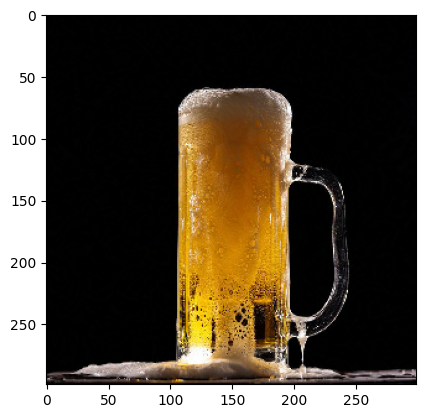

In [38]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [39]:
y=iv3.predict(adv)
decode_predictions(y)#pasa de y al resultado

[[('n06359193', 'web_site', 1.0),
  ('n03950228', 'pitcher', 1.09975776e-13),
  ('n04328186', 'stopwatch', 1.1588393e-15),
  ('n04409515', 'tennis_ball', 1.0328996e-18),
  ('n01665541', 'leatherback_turtle', 2.9337023e-19)]]

In [40]:
from PIL import Image
im=Image.fromarray(adv[0].astype(np.uint8))
im.save(data_dir +"hackImage.png")